In [1]:
!pip3 install requests
!pip3 install beautifulsoup4

In [4]:
import requests
from bs4 import BeautifulSoup

response = requests.get("http://www.paullab.co.kr/stock.html")

response.encoding = 'utf-8'
html = response.text

soup = BeautifulSoup(html, 'html.parser')

In [5]:
html

'<!DOCTYPE html>\n<html lang="en">\n\n<head>\n  <meta charset="UTF-8">\n  <meta name="viewport" content="width=device-width, initial-scale=1.0">\n  <meta http-equiv="X-UA-Compatible" content="ie=edge">\n  <title>Document</title>\n  <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.4.1/css/bootstrap.min.css">\n  <link rel="stylesheet" type="text/css" href="https://pro.fontawesome.com/releases/v5.10.0/css/all.css" integrity="sha384-AYmEC3Yw5cVb3ZcuHtOA93w35dYTsvhLPVnYs9eStHfGJvOvKxVfELGroGkvsg+p" crossorigin="anonymous">\n  <style>\n    h1{\n      margin: 2rem;\n    }\n    h1>span{\n      font-size: 1rem;\n    }\n    .main {\n      width: 80%;\n      margin: 0 auto;\n      text-align: center;\n    }\n\n    table {\n      width: 100%;\n    }\n\n    a {\n      color: inherit;\n      cursor: pointer;\n      text-decoration: none;\n    }\n\n    a:hover {\n      color: #000;\n      text-decoration: none;\n    }\n\n    em {\n      font: inherit;\n    }\n\n    #informa

In [7]:
soup.select('.main')[0]
soup.select('.main')[1]
soup.select('.main')[2]

<div class="main">
<h2 id="제주코딩베이스캠프연구원">제주코딩베이스캠프 연구원</h2>
<h3><span style="color: salmon">일별</span> 시세</h3>
<table class="table table-hover">
<tbody>
<tr>
<th scope="col">날짜</th>
<th scope="col">종가</th>
<th scope="col">전일비</th>
<th scope="col">시가</th>
<th scope="col">고가</th>
<th scope="col">저가</th>
<th scope="col">거래량</th>
</tr>
<tr>
<td align="center "><span class="date">2019.10.23</span></td>
<td class="num"><span>6,650</span></td>
<td class="num">
<img alt="상승 " height="6 " src="ico_up.gif " style="margin-right:4px; " width="7 "/><span>
                            20
                        </span>
</td>
<td class="num"><span>6,590</span></td>
<td class="num"><span>6,830</span></td>
<td class="num"><span>6,580</span></td>
<td class="num"><span>398,421</span></td>
</tr>
<tr>
<td align="center"><span class="date">2019.10.22</span></td>
<td class="num"><span>6,630</span></td>
<td class="num">
<img alt="하락" height="6" src="ico_down.gif" style="margin-right:4px;" width="7"/><span class

In [19]:
그룹사별일일시가 = soup.select('.main')[2:]
오늘종가 = []
오늘시가총액 = []

for i in 그룹사별일일시가:
    오늘종가.append(int(i.select('.table > tbody > tr')[1].select('td')[1].select('td > span')[0].text.replace(',','')))

In [27]:
오늘시가총액 = [i*10000 for i in 오늘종가]
전그룹사시가총액 = format(sum(오늘시가총액), ',')
전그룹사시가총액

'538,000,000'

In [39]:
그룹사별일일시가 = soup.select('.main')[2:]
오늘종가 = []
오늘시가총액 = []

for j in range(1, len(soup.select('.main')[2].select('.table > tbody > tr'))):
    오늘종가 = []
    for i in 그룹사별일일시가:
        오늘종가.append(int(i.select('.table > tbody > tr')[j].select('td')[1].select('td > span')[0].text.replace(',','')))
    오늘시가총액.append(sum(오늘종가))

오늘시가총액 = [i*10000 for i in 오늘시가총액]
오늘시가총액

[538000000,
 531800000,
 536150000,
 523050000,
 490350000,
 487550000,
 469700000,
 461400000,
 459000000,
 457650000,
 440000000,
 432100000,
 438300000,
 443100000,
 448500000,
 443700000,
 439350000,
 441800000,
 444100000,
 462450000]

In [36]:
날짜 = soup.select('.main')[2].select('.table > tbody > tr > td > .date')
date = []
for i in 날짜:
    date.append(i.text)
date

['2019.10.23',
 '2019.10.22',
 '2019.10.21',
 '2019.10.18',
 '2019.10.17',
 '2019.10.16',
 '2019.10.15',
 '2019.10.14',
 '2019.10.11',
 '2019.10.10',
 '2019.10.08',
 '2019.10.07',
 '2019.10.04',
 '2019.10.02',
 '2019.10.01',
 '2019.09.30',
 '2019.09.27',
 '2019.09.26',
 '2019.09.25',
 '2019.09.24']

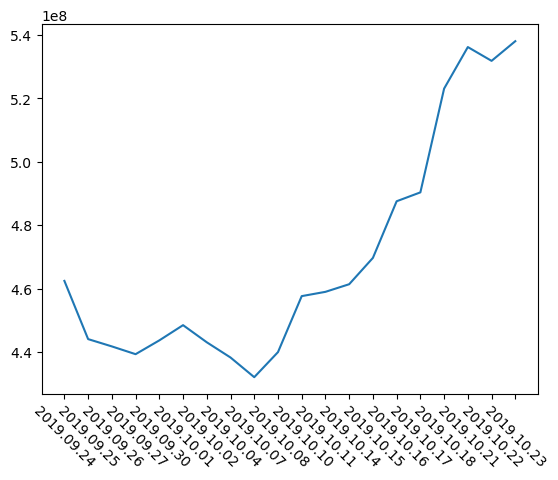

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(date[::-1], 오늘시가총액[::-1])
plt.xticks(rotation = -45)
plt.show()